<a href="https://colab.research.google.com/github/Himanshu-Dharma/Elon_bots_sentiment_analysis/blob/Lalo/tweetslalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start
Here is Lalo's code for Data Lab regarding the Tweets project

## Importing Libraries

In [143]:
# For system related operations
import sys
#For the creation of dataframes and manipulating data
import pandas as pd
from pandas import Series

from pandas.api.types import is_numeric_dtype
# For numerical processing
import numpy as np
# For statistical analysis
import statistics
#Tweets visualization and plotting
import json
#!pip install --upgrade matplotlib==3.4.2
import matplotlib.pyplot as plt
import seaborn as sns
#For Xsticks options
from pylab import*

import seaborn as sns



## Setting the Files

In [144]:
# Mount drive to read file from your google drive. file should be already on personal drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# Load the data
data = pd.read_json(open("/content/drive/MyDrive/tweets_ws22_v1.json", "r", encoding="utf8"))  

In [146]:
#Create a Dataframe of the Data
df = pd.DataFrame (data)
df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,{'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...,NaN
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,{'topic': [{'tweet_id': '8b4d2a34-c4f0-0e19-40...,NaN
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,{'topic': [{'tweet_id': '1fd08862-d8c7-0682-6b...,NaN


## Start of Data Understanding


## Initial Exploration


In [147]:
#Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df
#We might have to omit geography as most of the tweets dont have information there

,percent_missing
source_created_at,0.000000
author_id,0.000000
text,0.000000
source,0.000000
language,0.000000
longitude,91.592424
latitude,91.592424
id,0.000000
labels,0.000000
source_id,8.265974


In [148]:
# We need to check what is inside the column 'labels', as it is a nested dictionary containing some important info. 
data.labels[0]

{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'relevant': True,
   'topic': 'service',
   'ground_truth': True,
   'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
 'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'sentiment': 'negative',
   'ground_truth': True,
   'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}

In [149]:
#Check for the data types but noted no relevant info here
df.dtypes

source_created_at    datetime64[ns]
author_id                    object
text                         object
source                       object
language                     object
longitude                   float64
latitude                    float64
id                           object
labels                       object
source_id                   float64
dtype: object

In [150]:
# Separate the dictionaries into columns
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

df = unpack(df, 'labels', 0)
df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,topic,sentiment
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,[{'tweet_id': '0a799c07-8b76-17ba-b840-e538d51...,[{'tweet_id': '0a799c07-8b76-17ba-b840-e538d51...
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,[{'tweet_id': '8b4d2a34-c4f0-0e19-4055-dfe4af5...,[{'tweet_id': '8b4d2a34-c4f0-0e19-4055-dfe4af5...
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,[{'tweet_id': '1fd08862-d8c7-0682-6b11-2603fba...,[{'tweet_id': '1fd08862-d8c7-0682-6b11-2603fba...


In [151]:
#extract the elements of topic from the main dataframe
topic = pd.DataFrame.from_dict(dict(df.topic),orient='index')
df1 = pd.DataFrame([x for x in topic[0]])
df1.head()

,tweet_id,user_id,relevant,topic,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1


In [152]:
#extract the elements of sentiment from the main dataframe
sentiment = pd.DataFrame.from_dict(dict(df.sentiment),orient='index')
df2 = pd.DataFrame([x for x in sentiment[0]])
df2.head()

,tweet_id,user_id,sentiment,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98


In [153]:
# Merge the main dataframe plus the extracts from the previous ones and delete duplicated or no longer needed columns
df_new = pd.merge(df, pd.merge(df1, df2, left_index=True, right_index=True), left_index=True, right_index=True)
df_new = df_new.drop(columns=['topic_x', 'sentiment_x', 'user_id_y', 'tweet_id_y'])
df_new['source_created_at'] = pd.to_datetime(df_new['source_created_at'])
df_new.rename(columns={'topic_y': 'topic', 'sentiment_y': 'sentiment', 'source_created_at': 'datetime'}, inplace=True)
df_new

,datetime,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,user_id_x,relevant,topic,ground_truth_x,id_x,sentiment,ground_truth_y,id_y
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35.000,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,1.149220e+18,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,neutral,True,be02e403-49c2-e366-3324-09f1696ce526
16945,2020-08-10 11:19:10.181,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,NaN,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10
16946,2020-08-29 09:51:10.833,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,NaN,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0
16947,2020-11-02 12:06:06.967,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,NaN,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf


In [154]:
df = df_new

In [155]:
#Creation of columns from the datetime column
import datetime
import calendar
df['weekdayn'] = df['datetime'].dt.dayofweek
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['monthname'] = df['datetime'].dt.month_name()
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.strftime("%H:%M:%S")
df['date'] = df['datetime'].dt.date
df['yearmonth'] = df['datetime'].dt.to_period('M')
df.head()

,datetime,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,...,id_y,weekdayn,weekday,hour,month,monthname,year,time,date,yearmonth
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,...,5ee4d218-65a9-70a0-0964-a5b00e594a41,4,Friday,21,9,September,2020,21:56:20,2020-09-18,2020-09
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,...,2f8d741f-59cf-d1ab-27f9-5537a9718f94,1,Tuesday,7,10,October,2020,07:31:53,2020-10-13,2020-10
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,...,be479c30-17c3-220f-8eae-eaf6fc874431,0,Monday,19,10,October,2020,19:27:24,2020-10-26,2020-10
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,...,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,0,Monday,19,10,October,2020,19:28:49,2020-10-26,2020-10
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,...,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,0,Monday,11,9,September,2020,11:59:41,2020-09-28,2020-09


## Initial Graphs

Text(0.5, 0, 'Source')

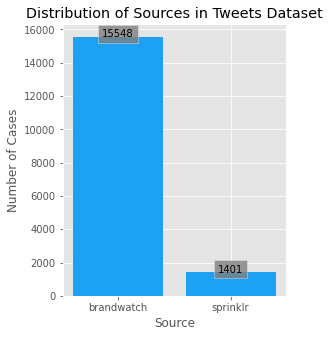

In [156]:
# Frequency distribution of source
source = df['source'].value_counts()
source  = source .rename_axis('source').reset_index(name='count')
source['source'] = source['source'].astype('category')
x, y = source['source'], source['count']
plt.figure(figsize=(4,5))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.8))
plt.title('Distribution of Sources in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Source', fontsize=12)
# plt.savefig('sourcecount.jpeg')

Text(0.5, 0, 'Topic')

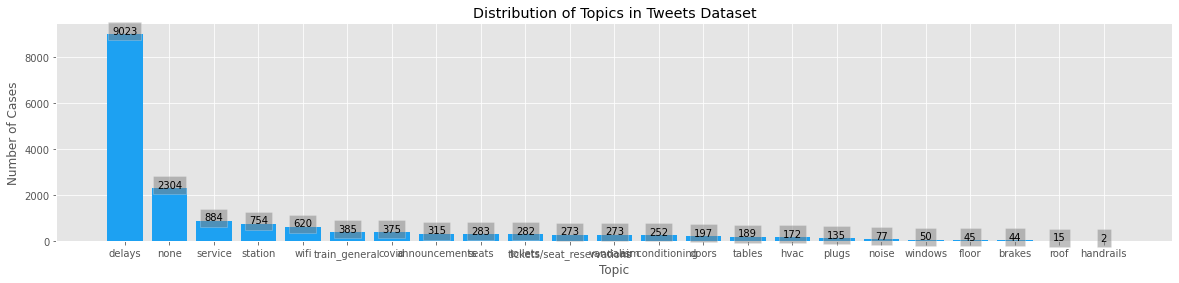

In [157]:
# Frequency distribution of topics
topic = df['topic'].value_counts()
topic  = topic .rename_axis('topic').reset_index(name='count')
topic['topic'] = topic['topic'].astype('category')
x, y = topic['topic'], topic['count']
plt.figure(figsize=(20,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Distribution of Topics in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Topic', fontsize=12)
# plt.savefig('topicscount.jpeg')

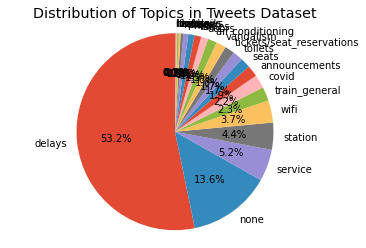

<Figure size 1080x288 with 0 Axes>

In [158]:
# Frequency distribution of topics
topic = df['topic'].value_counts()
topic  = topic .rename_axis('topic').reset_index(name='count')
topic['topic'] = topic['topic'].astype('category')
x, y = topic['topic'], topic['count']
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Distribution of Topics in Tweets Dataset')
plt.figure(figsize=(15,4))
plt.show()

Text(0.5, 0, 'Sentiment')

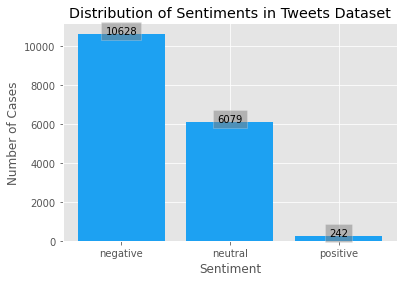

In [159]:
# Frequency distribution of sentiment
sentiment = df['sentiment'].value_counts()
sentiment  = sentiment .rename_axis('sentiment').reset_index(name='count')
sentiment['sentiment'] = sentiment['sentiment'].astype('category')
x, y = sentiment['sentiment'], sentiment['count']
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Distribution of Sentiments in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
# plt.savefig('sentimentcount.jpeg')

In [160]:
df.columns
from google.colab import files
df.to_csv('filename.csv') 
#files.download('tweets.csv')

In [161]:
#Get number of tweets by week of day
weekday_count = pd.DataFrame(df.sort_values('weekdayn', ascending = True).groupby(['weekdayn','weekday'])['id'].count().reset_index())
weekday_count.rename(columns={'id': 'Number of Tweets'}, inplace=True)
weekday_count = weekday_count.sort_values(['weekdayn'])
weekday_count

,weekdayn,weekday,Number of Tweets
0,0,Monday,2601
1,1,Tuesday,2875
2,2,Wednesday,3406
3,3,Thursday,3102
4,4,Friday,2498
5,5,Saturday,1558
6,6,Sunday,909


Text(0.5, 0, 'Day of Week')

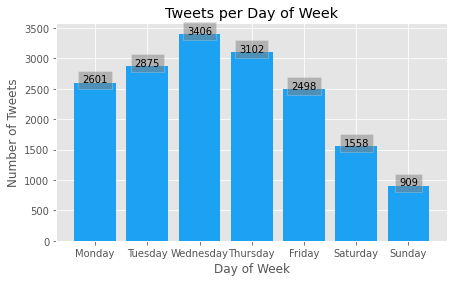

In [162]:
# Frequency distribution by day of week
x, y = weekday_count['weekday'], weekday_count['Number of Tweets']
plt.figure(figsize=(7,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Tweets per Day of Week')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
# plt.savefig('sentimentcount.jpeg')

Text(0.5, 0, 'Hour of Day')

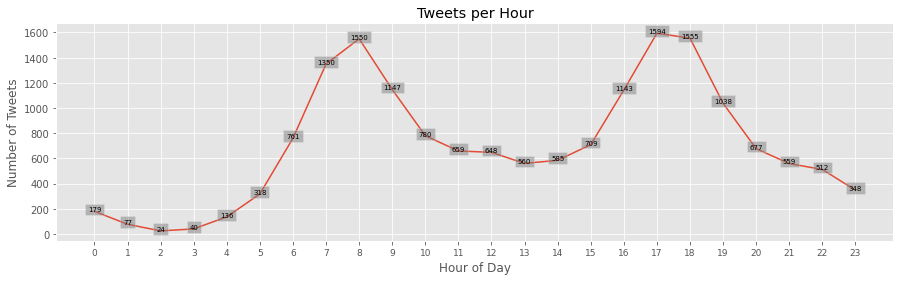

In [163]:
#Get number of tweets by hour
hour_count = pd.DataFrame(df.groupby(['hour'])['id'].count().reset_index())
hour_count.rename(columns={'id': 'Number of Tweets'}, inplace=True)
hour_count = hour_count.sort_values(['hour'])

x, y = hour_count['hour'], hour_count['Number of Tweets']
plt.figure(figsize=(15,4))
plt.plot(x, y)
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 
plt.style.use('ggplot')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5), fontsize=7)
plt.title('Tweets per Hour')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)

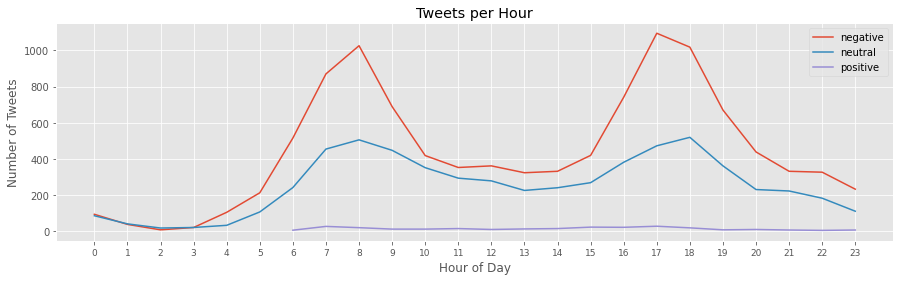

In [164]:
#Get number of tweets by hour and sentiment
df1 = pd.pivot_table(df, values='id', index=['hour'],
                    columns=['sentiment'], aggfunc=['count'])
df1
###df1.plot.line()
x, y = df1.index.values, df1['count']
plt.figure(figsize=(15,4))
plt.plot(x, y)
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 
plt.style.use('ggplot')
plt.title('Tweets per Hour')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.gca().legend(('negative', 'neutral', 'positive'))

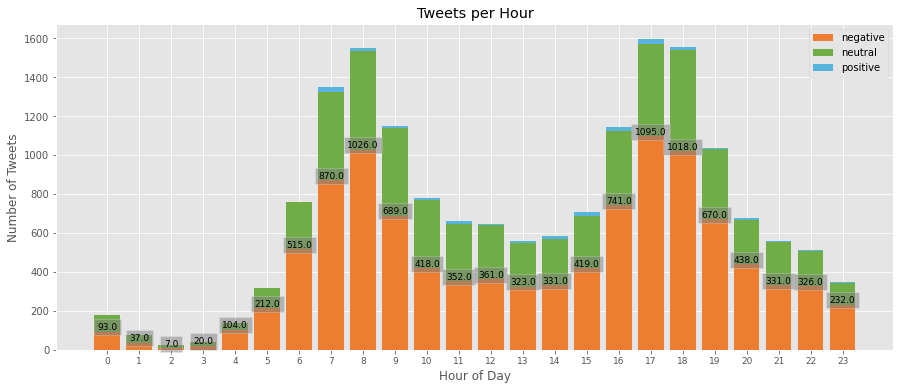

In [165]:
# create data
x = df1.index.values
y1 = df1['count']['negative']
y2 = df1['count']['neutral']
y3 = df1['count']['positive']
# plot bars in stack manner
plt.figure(figsize=(15,6))
plt.bar(x, y1, color='#ED7D31')
plt.bar(x, y2, bottom=y1, color='#70AD47')
plt.bar(x, y3, bottom=y1+y2, color='#59B4DD')
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 
plt.style.use('ggplot')
plt.title('Tweets per Hour')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.gca().legend(('negative', 'neutral', 'positive'))
for i in range(len(x)):
  plt.text(i, y1[i], y1[i], ha='center', va='bottom',
    Bbox = dict(facecolor = 'grey', alpha =.5), fontsize=9)

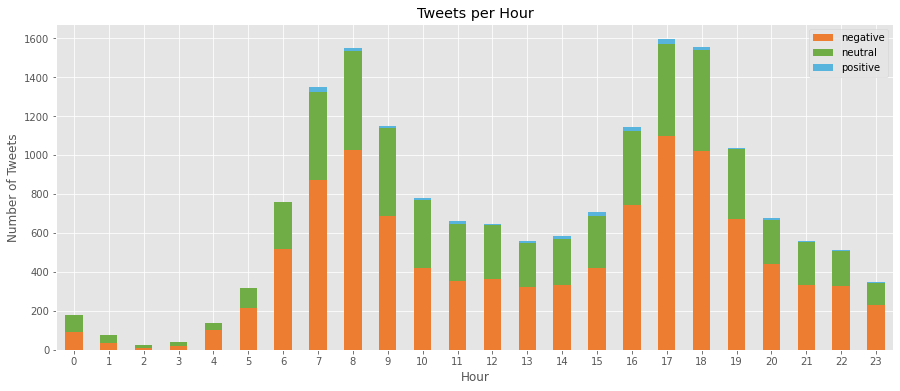

In [166]:
ax = df1.plot(kind='bar', stacked=True, figsize=(15, 6), rot=0, xlabel='Hour', ylabel='Number of Tweets', color = ['#ED7D31','#70AD47','#59B4DD'], title='Tweets per Hour')
ax.legend(('negative', 'neutral', 'positive'))
# ticks= ['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
# ax.axes.set_xticks(ticks, minor=False)
# for c in ax.containers:
#      labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
# #     # remove the labels parameter if it's not needed for customized labels
#      ax.bar_label(c,fmt='%0.0f', label_type='center')

In [167]:
df_new = pd.DataFrame(df.groupby(['topic'])['id'].count().reset_index())
df_new.rename(columns={'id': 'Number of Tweets'}, inplace=True)
df_new = df_new.sort_values(['Number of Tweets'], ascending=False)
df_new

,topic,Number of Tweets
4,delays,9023
10,none,2304
14,service,884
15,station,754
21,wifi,620
19,train_general,385
3,covid,375
1,announcements,315
13,seats,283
18,toilets,282


In [168]:
#Regroup of topic labels. We keep 6 different topics: Delays, None, Service, Station, Wifi and Other
df_new = df
df_new.loc[df_new["topic"].str.contains("delay"), 'topic_group'] = 'delays'
df_new.loc[df_new["topic"].str.contains("none"), 'topic_group'] = 'none'
df_new.loc[df_new["topic"].str.contains("service"), 'topic_group'] = 'service'
df_new.loc[df_new["topic"].str.contains("station"), 'topic_group'] = 'station'
df_new.loc[df_new["topic"].str.contains("wifi"), 'topic_group'] = 'wifi'
df_new.loc[~df_new["topic"].str.contains("delay|none|service|station|wifi"), 'topic_group'] = 'other'
# df_new.loc[data['age'].between(20,24), 'age_group'] = 'yadult'
# df_new.loc[data['age'].between(25,39), 'age_group'] = 'adult'
# df_new.loc[data['age']>39, 'age_group'] = 'older_adult'
df = df_new
df[['topic', 'topic_group']]

,topic,topic_group
0,service,service
1,delays,delays
2,toilets,other
3,toilets,other
4,seats,other
...,...,...
16944,announcements,other
16945,plugs,other
16946,tables,other
16947,toilets,other


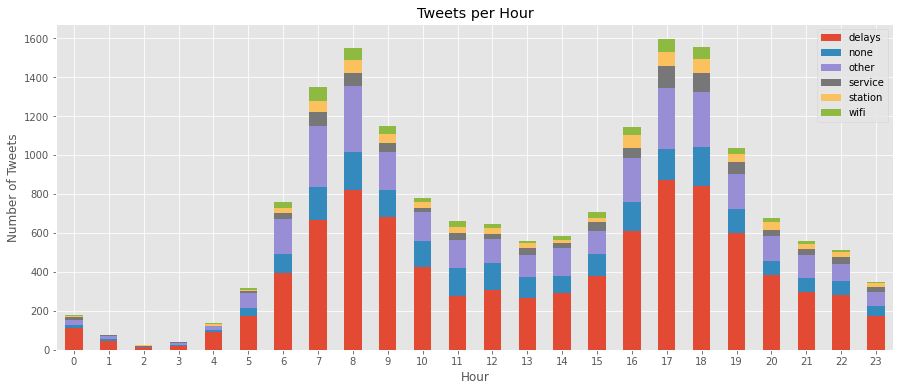

In [169]:
#Get number of tweets by hour and sentiment
df1 = pd.pivot_table(df, values='id', index=['hour'],
                    columns=['topic_group'], aggfunc=['count'])
df1
#Plot by topic grouped
ax = df1.plot(kind='bar', stacked=True, figsize=(15, 6), rot=0, xlabel='Hour', ylabel='Number of Tweets', title='Tweets per Hour')
ax.legend(('delays', 'none', 'other','service','station','wifi'))


Text(0.5, 0, 'Date')

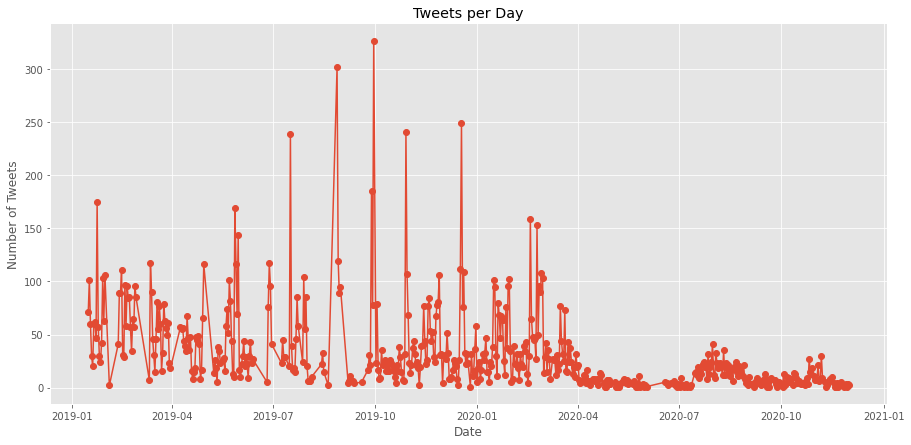

In [170]:
df_new = pd.DataFrame(df.groupby(['date'])['id'].count().reset_index())
df_new.rename(columns={'id': 'Number of Tweets'}, inplace=True)
df_new = df_new.sort_values(['date'], ascending=True)
df_new

date = df_new['date']
price_close = df_new['Number of Tweets']
plt.figure(figsize=(15,7))
plt.plot_date(date, price_close, linestyle='solid')
#xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 
plt.style.use('ggplot')
plt.title('Tweets per Day')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Date', fontsize=12)

In [171]:
df_new = pd.DataFrame(df.groupby(['date'])['id'].count().reset_index())
df_new.rename(columns={'id': 'Number of Tweets'}, inplace=True)
df_new = df_new.sort_values(['Number of Tweets'], ascending=False)
df_new.head(15)

,date,Number of Tweets
157,2019-09-30,327
142,2019-08-28,302
235,2019-12-18,249
185,2019-10-29,241
121,2019-07-17,239
155,2019-09-28,185
8,2019-01-24,175
94,2019-05-28,169
296,2020-02-18,159
302,2020-02-24,153


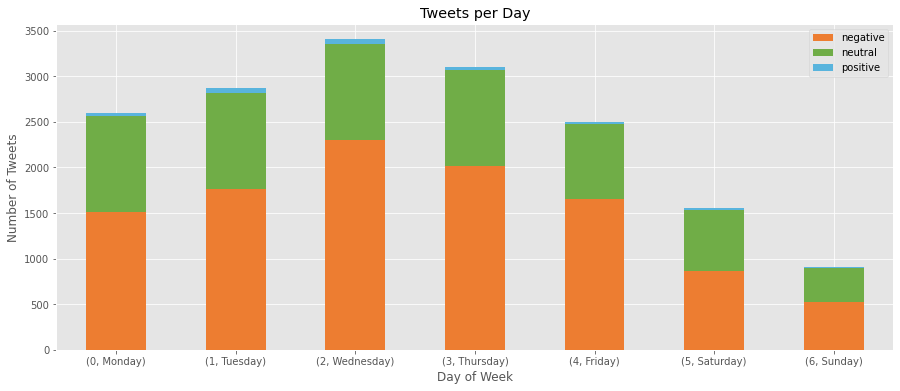

In [172]:
#Get number of tweets by hour and sentiment
df1 = pd.pivot_table(df, values=['id'], index=['weekdayn','weekday'],
                    columns=['sentiment'], aggfunc=['count'])
df1
#Plot
ax = df1.plot(kind='bar', stacked=True, figsize=(15, 6), rot=0, xlabel='Day of Week', ylabel='Number of Tweets', color = ['#ED7D31','#70AD47','#59B4DD'], title='Tweets per Day')
ax.legend(('negative', 'neutral', 'positive'))
# ticks= ['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
# ax.axes.set_xticks(ticks, minor=False)
# for c in ax.containers:
#      labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
# #     # remove the labels parameter if it's not needed for customized labels
#      ax.bar_label(c,fmt='%0.0f', label_type='center')

[Text(33.0, 0.5, 'Hour'),
 Text(0.5, 15.0, 'Date'),
 Text(0.5, 1.0, 'Tweets per month and hour')]

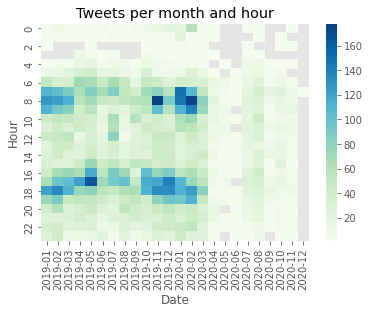

In [173]:
#Create a pivot dataframe of date, hours, tweets
dfp = df.pivot_table(index='hour', columns='yearmonth', values='id', aggfunc='count')
dfp.head()

#Plot a heatmap to visualize the data by month and hour
s = sns.heatmap(dfp, cmap='GnBu')
s.set(xlabel='Date', ylabel='Hour', title='Tweets per month and hour')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



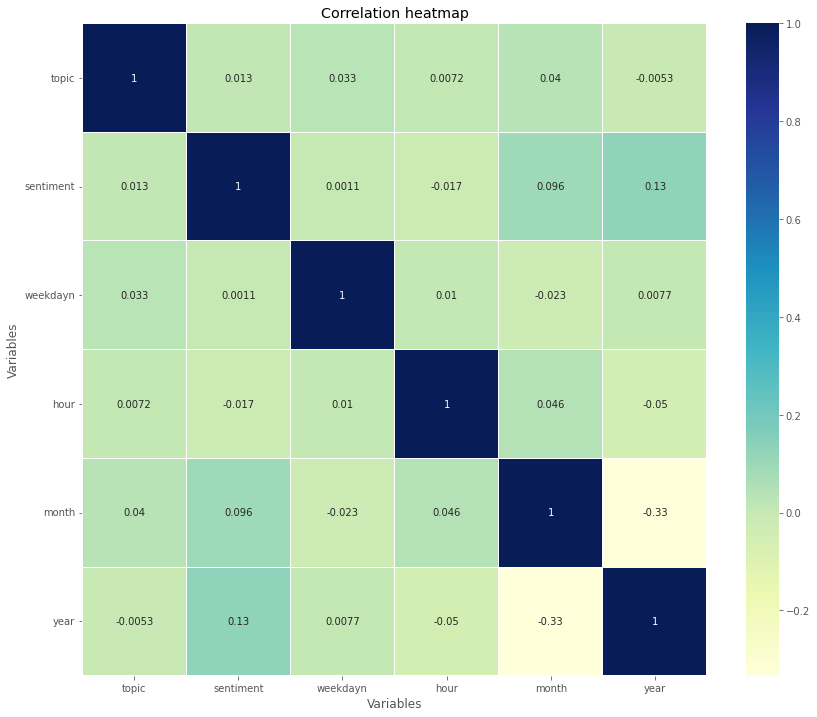

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# The data is categorial so I convert it with LabelEncoder to transfer to ordinal.
df_new = df[['topic', 'sentiment', 'weekdayn','hour','month','year']]

labelencoder=LabelEncoder()
for column in df_new.columns:
    df_new[column] = labelencoder.fit_transform(df_new[column])

plt.figure(figsize=(14,12))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.ylabel("Variables")
plt.xlabel("Variables")
plt.title('Correlation heatmap');

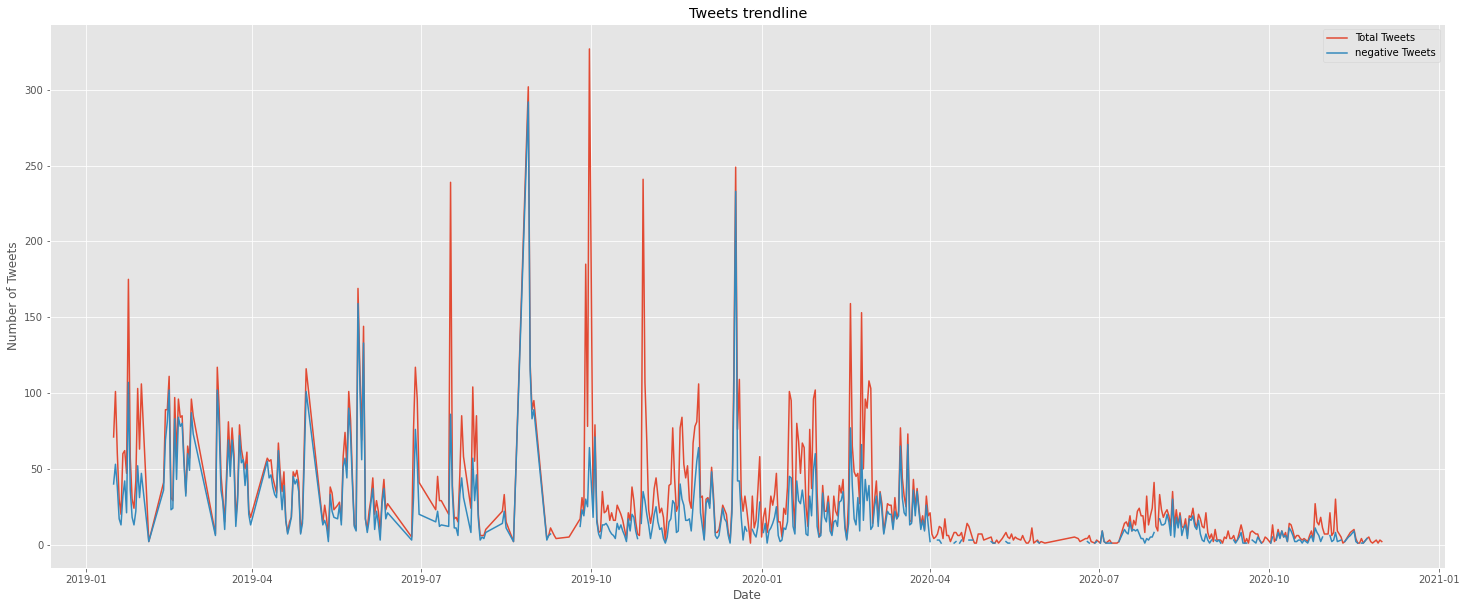

In [175]:
df1 = pd.pivot_table(df, values=['id'], index=['date'],
                    columns=['sentiment'], aggfunc=['count'])
df1 = pd.DataFrame(df1)
df1.columns = ["_".join((j,k,i)) for i,j,k in df1.columns]
df1['date'] = df1.index
df1['Number of tweets'] = df1.fillna(0)['id_negative_count'] + df1.fillna(0)['id_neutral_count'] + df1.fillna(0)['id_positive_count']
df1.rename(columns={'id_negative_count': 'negative', 'id_neutral_count': 'neutral', 'id_positive_count': 'positive'}, inplace=True)
df1

plt.figure(figsize=(25,10))
plt.plot(df1['date'], df1['Number of tweets'], label='Total Tweets')
plt.plot(df1['date'], df1['negative'], label='negative Tweets')
plt.style.use('ggplot')
plt.title('Tweets trendline')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(loc="upper right")

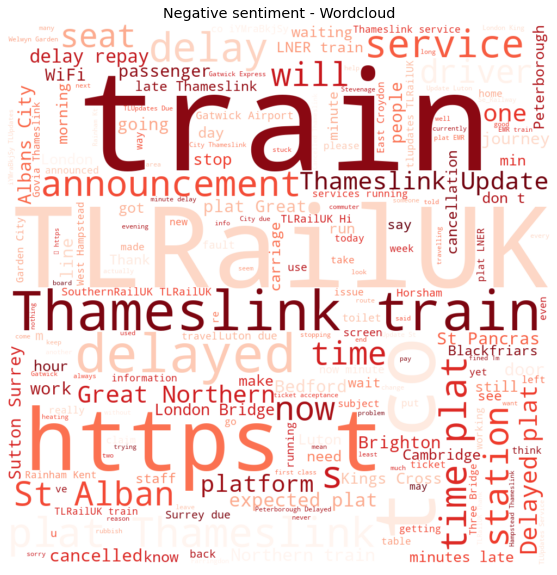

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Polarity ==  negative
train_s0 = df[df.sentiment == 'negative']
all_text = ' '.join(word for word in df.text)
wordcloud_neg = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white').generate(all_text) #mode='RGBA'
plt.figure(figsize=(20,10))
plt.title('Negative sentiment - Wordcloud')
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [177]:
import plotly.express as px

df1 = df[df['latitude'].notna()]

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df1, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="text", 
                        # hover_data=["Address", "Listed"],
                        color="sentiment",
                         color_continuous_scale=color_scale,
                        size_max=20,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## DATA CLEANSING 

In [178]:
# Data prep steps to achieve by Sunday 5 PM
# 1. Flag duplicates 
# 2. Flag service accounts --> DONE
# 3. Relabel positive + neutral and put them to the same group --> DONE
# 4. Ad-hoc insights


In [179]:
#Regroup of sentiment. We create a binary label: Negative and Other (combines Neutral and Positive)
df_new = df
df_new.loc[df_new["sentiment"].str.contains("negative"), 'sentiment_group'] = 'negative'
df_new.loc[df_new["sentiment"].str.contains("positive|neutral"), 'sentiment_group'] = 'other'
df = df_new
df[['sentiment', 'sentiment_group']].head(15)

,sentiment,sentiment_group
0,negative,negative
1,negative,negative
2,negative,negative
3,negative,negative
4,neutral,other
5,negative,negative
6,negative,negative
7,negative,negative
8,negative,negative
9,negative,negative


AS some information of the author ID was wrongly displayed, I converted it to numeric and then removed the scientific notation so we have the authors ids correctly labeled.
One example of the error was that previously we had Author ID: 963564801195741 AND Author ID: 9.63565E+17. They represent the same author ID but Python would take them as different. Now they are joined together with the next code:

In [180]:
#We first make a copy
df_new = df
#I converted the authors id to numeric
df_new.author_id = pd.to_numeric(df_new.author_id, errors='coerce')
#Then i remove the scientific notation and finally rename the table to df again.
df_new['author_id'] =[np.format_float_positional(x) for x in df_new['author_id']]
df = df_new
df.head()

,datetime,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,...,weekday,hour,month,monthname,year,time,date,yearmonth,topic_group,sentiment_group
0,2020-09-18 21:56:20.798,593731316.,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,...,Friday,21,9,September,2020,21:56:20,2020-09-18,2020-09,service,negative
1,2020-10-13 07:31:53.122,745583289520496600.,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,...,Tuesday,7,10,October,2020,07:31:53,2020-10-13,2020-10,delays,negative
2,2020-10-26 19:27:24.695,303134761.,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,...,Monday,19,10,October,2020,19:27:24,2020-10-26,2020-10,other,negative
3,2020-10-26 19:28:49.281,303134761.,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,...,Monday,19,10,October,2020,19:28:49,2020-10-26,2020-10,other,negative
4,2020-09-28 11:59:41.212,56427671.,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,...,Monday,11,9,September,2020,11:59:41,2020-09-28,2020-09,other,other


In [181]:
#Now that all Authors are correctly labeled, we get Top users
top_users = pd.DataFrame(df.groupby(['author_id'])['id'].count().reset_index())
top_users.rename(columns={'id': 'Number of Tweets'}, inplace=True)
top_users = top_users.sort_values(['Number of Tweets'], ascending=False)
top_users.head(20)

,author_id,Number of Tweets
2904,2589703207.,1173
6329,963564801195741200.,790
363,1099408261781032800.,294
554,1143420803549151200.,247
535,1138890083334070100.,199
534,1138765268505759600.,163
3758,3329830353.,137
4007,361312721.,123
552,1143408237263413200.,120
3661,320797050.,113


LIST OF ACCOUNTS WITH MORE THAN 100 TWEETS
Official Thameslink or Official Railroad Service Accounts:
2589703207 = @TLRailUK
361312721 = @Se_Railway
171114552 = @SouthernRailUK

NOT Official Thameslink Service Accounts:
963564801195741200 = @eutc_alerts 
1099408261781032800 = @TrainBeacon
1143420803549151200 = @FPK_Updates
1138890083334070000 = No user found but tweets styled as the ones from @FPK_Updates
1138765268505759600 = No user found but tweets styled as the ones from @FPK_Updates
3329830353 = @GreyWolfDesignz
1143408237263413200 = No user found but tweets styled as the ones from @FPK_Updates
320797050 = @Oldtraindriver 


In [182]:
#Identification of service accounts. For the moment I just flagged the officially official accounts :p
df_new = df
df_new.loc[df_new["author_id"].str.contains("2589703207|361312721|171114552|963564801195741200|1099408261781032800|1143420803549151200|1138890083334070000|1138765268505759600|1143408237263413200"), 'service_accounts'] = 1
df_new.loc[~df_new["author_id"].str.contains("2589703207|361312721|171114552|963564801195741200|1099408261781032800|1143420803549151200|1138890083334070000|1138765268505759600|1143408237263413200"), 'service_accounts'] = 0
df = df_new
df[['author_id', 'service_accounts']]
#Check for the number of tweets coming from service accounts. Reponse: 3022
df1 = df.query("service_accounts == 1")
df1.shape

(3022, 30)

In [183]:
df.head()

,datetime,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,...,hour,month,monthname,year,time,date,yearmonth,topic_group,sentiment_group,service_accounts
0,2020-09-18 21:56:20.798,593731316.,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,...,21,9,September,2020,21:56:20,2020-09-18,2020-09,service,negative,0.0
1,2020-10-13 07:31:53.122,745583289520496600.,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,...,7,10,October,2020,07:31:53,2020-10-13,2020-10,delays,negative,0.0
2,2020-10-26 19:27:24.695,303134761.,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,...,19,10,October,2020,19:27:24,2020-10-26,2020-10,other,negative,0.0
3,2020-10-26 19:28:49.281,303134761.,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,...,19,10,October,2020,19:28:49,2020-10-26,2020-10,other,negative,0.0
4,2020-09-28 11:59:41.212,56427671.,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,...,11,9,September,2020,11:59:41,2020-09-28,2020-09,other,other,0.0


Duplicates: After looking at the tweets I identified some repeated tweets ID. All the ones i found, where duplicated because the same tweet generated more than 1 topic. Therefore, it is duplicated in every row except topic. For the moment I just flagged them and counted the number of times they appear.
My assumption is that the number of times they appear is the number of topics they generated.

In [184]:
#I created a new column with the frequency of each tweet id
df['TweetID_freq'] = df.groupby('id')['id'].transform('count')
#Count the number of rows and columns
df.shape

(16949, 31)

In [185]:
#Drop natural duplicates
df.drop_duplicates
df.shape

(16949, 31)

In [186]:
#Number of unique tweets
df['id'].nunique()

15749

In [187]:
#I created a new table with only the frequencies above 1
df1 = df[df.TweetID_freq > 1]
#Get the number of unique tweets in the duplicates
df1['id'].nunique()
#Finally i check the number of tweets that have more than 1 in Frequency. Response: 2219 Tweets
df1.shape

(2219, 31)

In [188]:
#Number of tweets without the tweets that are duplicated
df2 = df[df.TweetID_freq == 1]
df2.shape

(14730, 31)

In [189]:
#Number of tweets without the service accounts
df_new = df[df.service_accounts == 0]
df_new.shape

(13927, 31)

In [190]:
#Remove the duplicates keeping at least one of the original tweets.
df_new = df.drop_duplicates(subset='id', keep="first")
#Remove the tweets that come from service accounts
df_new = df_new[df_new.service_accounts == 0]
#Number of new tweets
df_new.shape

(12838, 31)

Text(0.5, 0, 'Sentiment')

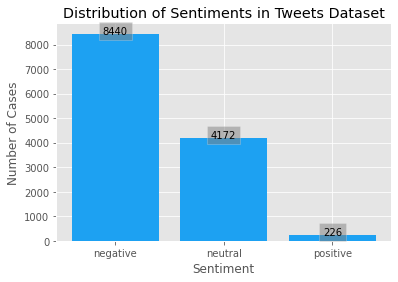

In [191]:
# Frequency distribution of sentiment
sentiment = df_new['sentiment'].value_counts()
sentiment  = sentiment .rename_axis('sentiment').reset_index(name='count')
sentiment['sentiment'] = sentiment['sentiment'].astype('category')
x, y = sentiment['sentiment'], sentiment['count']
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Distribution of Sentiments in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
# plt.savefig('sentimentcount.jpeg')

In [192]:
df_new.to_csv(r'/content/drive/MyDrive/Lalotweets2.csv', index=False)

## Rough setup of a model

In [193]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [194]:
#Encode the variable of sentiment
df = df_new
sent_dict = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df.sentiment.map(sent_dict)
df[['sentiment', 'target']]

,sentiment,target
0,negative,0
1,negative,0
2,negative,0
3,negative,0
4,neutral,2
...,...,...
16943,neutral,2
16944,neutral,2
16945,neutral,2
16946,neutral,2


In [195]:
data=df[['text','target']]
data['target'].unique()

array([0, 2, 1])

In [196]:
#Separating positive and negative tweets from original dataframe
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
#Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [197]:
#Check for the number of tweets positive and negative
dataset.shape

(8666, 2)

In [198]:
#Making Tweets text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

16928    @geofftech i’ve done thameslink even if he ser...
16934    come on thameslink, despite the fact i don’t f...
16935    @tlrailuk you’ve never done it. i’m here now a...
16941    @gwrhelp @jamiebishop123 hi @gwrhelp, i'm sick...
16942    @tlrailuk yeah but it's glitching for a lot of...
Name: text, dtype: object

In [199]:
#Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
              'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 
             'tlrailuk', '@', 'thameslink', "'s", "'", '@tlrailuk', '@se_railway',
             "she's", "he's", 's', 't']

In [200]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

17      love train conductor(?), apologised non-workin...
2314    2,000 seats cambridge brighton commuters - htt...
2315    2,000 seats cambridge brighton commuters https...
2501    4 trains hour london bridge brighton 😱😱😱😱😱😱 fa...
2680    @btpcambs thank @btpcambs. glad see non mask w...
Name: text, dtype: object

In [201]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

17      love train conductor apologised nonworking toi...
2314    2000 seats cambridge brighton commuters  https...
2315    2000 seats cambridge brighton commuters httpst...
2501    4 trains hour london bridge brighton 😱😱😱😱😱😱 fa...
2680    btpcambs thank btpcambs glad see non mask wear...
Name: text, dtype: object

In [202]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

17      love train conductor apologised nonworking toi...
2314    2000 seats cambridge brighton commuters  https...
2315    2000 seats cambridge brighton commuters httpst...
2501    4 trains hour london bridge brighton 😱😱😱😱😱😱 fa...
2680    btpcambs thank btpcambs glad see non mask wear...
Name: text, dtype: object

In [203]:
#Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

17      love train conductor apologised nonworking toi...
2314    2000 seats cambridge brighton commuters  https...
2315    2000 seats cambridge brighton commuters httpst...
2501    4 trains hour london bridge brighton 😱😱😱😱😱😱 fa...
2680    btpcambs thank btpcambs glad see non mask wear...
Name: text, dtype: object

In [204]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

16928    geofftech i’ve done even service often goes po...
16934    come thameslink despite fact don’t fit ‘standa...
16935    you’ve never done it i’m announcements soo lou...
16941    gwrhelp jamiebisho hi gwrhelp im sick hearing ...
16942    yeah but its glitching lot this station is the...
Name: text, dtype: object

In [205]:
#Lemmatizing the words
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

17      love train conductor apologised nonworking toi...
2314     seats cambridge brighton commuters  httpstcor...
2315     seats cambridge brighton commuters httpstcoer...
2501     trains hour london bridge brighton 😱😱😱😱😱😱 fai...
2680    btpcambs thank btpcambs glad see non mask wear...
Name: text, dtype: object

In [206]:
#Mask for the wordcloud
from PIL import Image
import requests
from io import BytesIO
url = 'https://raw.githubusercontent.com/Himanshu-Dharma/Elon_bots_sentiment_analysis/Lalo/train2.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()
mask = np.array(img)

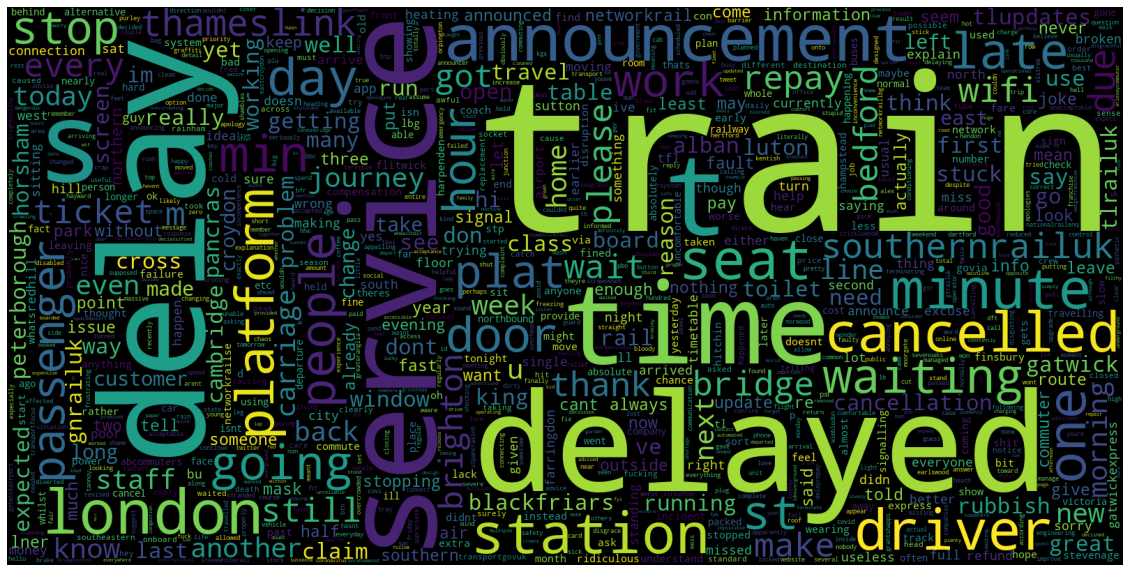

In [207]:
#Plot a cloud of words for negative tweets
data_neg = dataset.loc[df['target'] == 0, ['text']]
plt.figure(figsize = (20,20))

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg['text']))
plt.imshow(wc)
plt.axis("off")
plt.show()

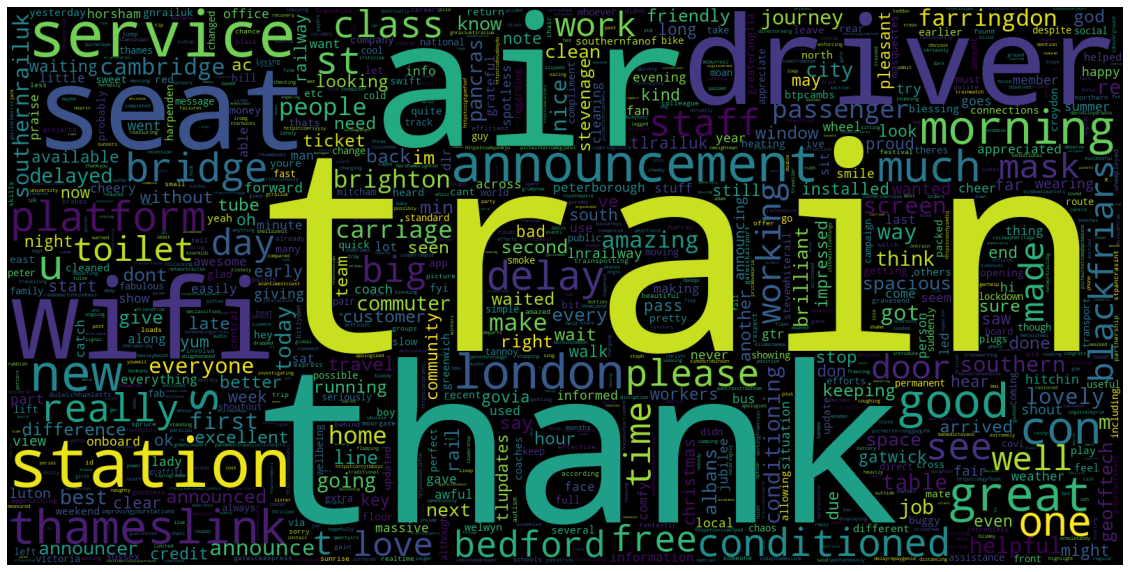

In [208]:
#Plot a cloud of words for positive tweets
data_pos = dataset.loc[df['target'] == 1, ['text']]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos['text']))
plt.imshow(wc)
plt.axis("off")
plt.show()

##Modeling

In [209]:
#Separating input feature and label
X=dataset.text
y=dataset.target

In [210]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [211]:
#Transforming Dataset using TF-IDF Vectorizer
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [212]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [213]:
#Function for model evaluation
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f"{v1} {v2}" for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Model 1

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1690
           1       0.31      0.25      0.28        44

    accuracy                           0.97      1734
   macro avg       0.65      0.62      0.63      1734
weighted avg       0.96      0.97      0.97      1734



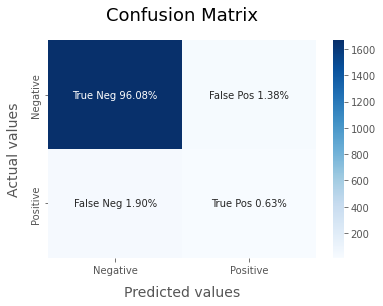

In [214]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

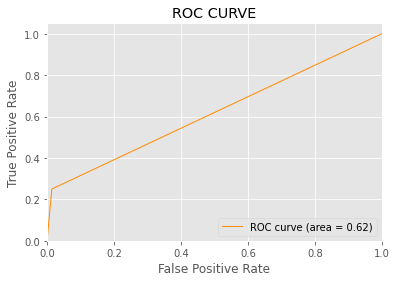

In [215]:
#plot the ROC AUC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Model 2

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.67      0.23      0.34        44

    accuracy                           0.98      1734
   macro avg       0.82      0.61      0.66      1734
weighted avg       0.97      0.98      0.97      1734



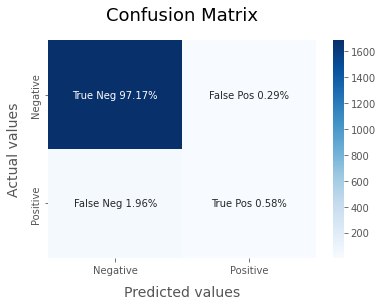

In [216]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

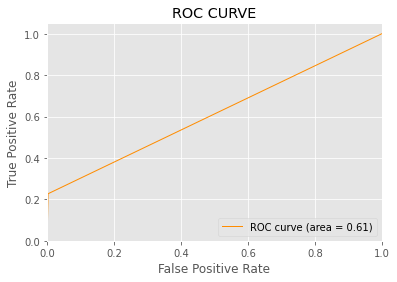

In [217]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### Model tunning

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  1000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.73      0.25      0.37        44

    accuracy                           0.98      1734
   macro avg       0.86      0.62      0.68      1734
weighted avg       0.97      0.98      0.97      1734



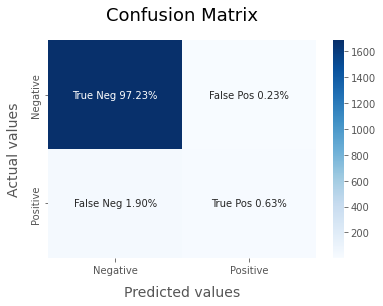

In [229]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)
#Transforming Dataset using TF-IDF Vectorizer
#Fit the TF-IDF Vectorizer
vectoriser2 = TfidfVectorizer(ngram_range=(1,2), max_features=2000)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser2.transform(X_train)
X_test  = vectoriser2.transform(X_test)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  1000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.88      0.34      0.49        44

    accuracy                           0.98      1734
   macro avg       0.93      0.67      0.74      1734
weighted avg       0.98      0.98      0.98      1734



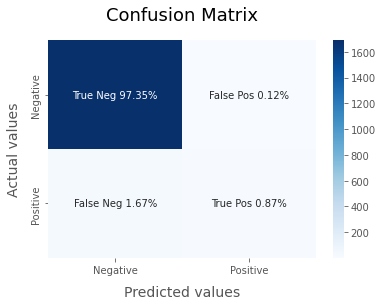

In [230]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)
#Transforming Dataset using TF-IDF Vectorizer
#Fit the TF-IDF Vectorizer
vectoriser2 = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser2.transform(X_train)
X_test  = vectoriser2.transform(X_test)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  1000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.94      0.34      0.50        44

    accuracy                           0.98      1734
   macro avg       0.96      0.67      0.75      1734
weighted avg       0.98      0.98      0.98      1734



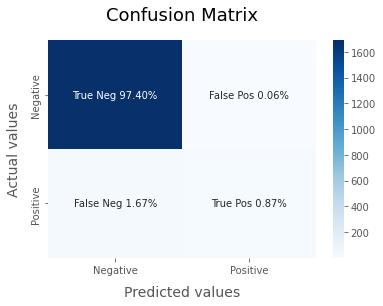

In [231]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)
#Transforming Dataset using TF-IDF Vectorizer
#Fit the TF-IDF Vectorizer
vectoriser2 = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser2.transform(X_train)
X_test  = vectoriser2.transform(X_test)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  1000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       1.00      0.27      0.43        44

    accuracy                           0.98      1734
   macro avg       0.99      0.64      0.71      1734
weighted avg       0.98      0.98      0.98      1734



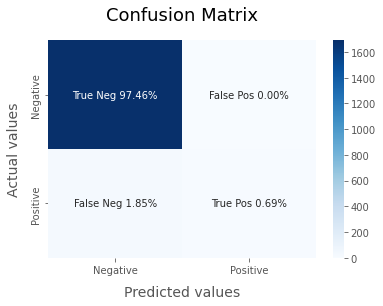

In [232]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)
#Transforming Dataset using TF-IDF Vectorizer
#Fit the TF-IDF Vectorizer
vectoriser2 = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser2.transform(X_train)
X_test  = vectoriser2.transform(X_test)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Model 3

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       1.00      0.05      0.09        44

    accuracy                           0.98      1734
   macro avg       0.99      0.52      0.54      1734
weighted avg       0.98      0.98      0.96      1734



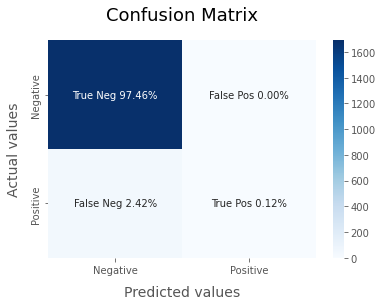

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

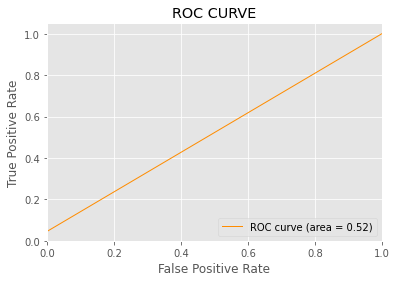

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

links that might help:
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/